In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
    


In [6]:
df=pd.read_csv("C:\\Users\\Kushal\\OneDrive\\Desktop\\Internship Projects\\Mobile Price Prediction\\data\\Mobile Phone Datasets.csv")

df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [8]:
df["ram"] = df["ram"].round(1)


In [9]:
df["RearCam"] = df["RearCam"].round()
df["Front_Cam"] = df["Front_Cam"].round()


In [10]:
df = df.rename(columns={"resoloution": "screen_size"})


In [11]:
df["ram"] = df["ram"].replace({
    0.512: 0.5,
    1.000: 1,
    1.500: 2,
    3.000: 3
})


In [15]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   screen_size   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [16]:
df.head()


,Product_id,Price,Sale,weight,screen_size,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.0,13.0,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.0,3.0,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,2.0,13.0,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.5,3.0,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.0,3.0,0.0,1700,9.9


In [17]:
df = df.drop_duplicates()


In [180]:
df.head()

,Product_id,Price,Sale,weight,screen_size,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0000,5.2000,424,8,1.3500,16.0000,3.0000,13.0000,8.0000,2610,7.4000
1,880,1749,10,125.0000,4.0000,233,2,1.3000,4.0000,1.0000,3.0000,0.0000,1700,9.9000
2,40,1916,10,110.0000,4.7000,312,4,1.2000,8.0000,2.0000,13.0000,5.0000,2000,7.6000
3,99,1315,11,118.5000,4.0000,233,2,1.3000,4.0000,0.5000,3.0000,0.0000,1400,11.0000
4,880,1749,11,125.0000,4.0000,233,2,1.3000,4.0000,1.0000,3.0000,0.0000,1700,9.9000


In [181]:
df.describe()


,Product_id,Price,Sale,weight,screen_size,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.0000,161.0000,161.0000,161.0000,161.0000,161.0000,161.0000,161.0000,161.0000,161.0000,161.0000,161.0000,161.0000,161.0000
mean,675.5590,2215.5963,621.4658,170.4261,5.2099,335.0559,4.8571,1.5028,24.5017,2.2186,10.3789,4.4969,2842.1118,8.9217
std,410.8516,768.1872,1546.6185,92.8886,1.5100,134.8267,2.4440,0.5998,28.8048,1.6076,6.2169,4.3462,1366.9908,2.1926
min,10.0000,614.0000,10.0000,66.0000,1.4000,121.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,800.0000,5.1000
25%,237.0000,1734.0000,37.0000,134.1000,4.8000,233.0000,4.0000,1.2000,8.0000,1.0000,5.0000,0.0000,2040.0000,7.6000
50%,774.0000,2258.0000,106.0000,153.0000,5.1500,294.0000,4.0000,1.4000,16.0000,2.0000,12.0000,5.0000,2800.0000,8.4000
75%,1026.0000,2744.0000,382.0000,170.0000,5.5000,428.0000,8.0000,1.8750,32.0000,3.0000,16.0000,8.0000,3240.0000,9.8000
max,1339.0000,4361.0000,9807.0000,753.0000,12.2000,806.0000,8.0000,2.7000,128.0000,6.0000,23.0000,20.0000,9500.0000,18.5000


In [182]:
df.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
screen_size     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [183]:
df.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
screen_size     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [184]:
df[df.duplicated()]

,Product_id,Price,Sale,weight,screen_size,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness


In [18]:
df.drop('Product_id', axis=1, inplace=True)

In [186]:
df.head()

,Price,Sale,weight,screen_size,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0000,5.2000,424,8,1.3500,16.0000,3.0000,13.0000,8.0000,2610,7.4000
1,1749,10,125.0000,4.0000,233,2,1.3000,4.0000,1.0000,3.0000,0.0000,1700,9.9000
2,1916,10,110.0000,4.7000,312,4,1.2000,8.0000,2.0000,13.0000,5.0000,2000,7.6000
3,1315,11,118.5000,4.0000,233,2,1.3000,4.0000,0.5000,3.0000,0.0000,1400,11.0000
4,1749,11,125.0000,4.0000,233,2,1.3000,4.0000,1.0000,3.0000,0.0000,1700,9.9000


In [187]:
df.dtypes

Price             int64
Sale              int64
weight          float64
screen_size     float64
ppi               int64
cpu core          int64
cpu freq        float64
internal mem    float64
ram             float64
RearCam         float64
Front_Cam       float64
battery           int64
thickness       float64
dtype: object

In [188]:
df['Price'].describe()

count    161.0000
mean    2215.5963
std      768.1872
min      614.0000
25%     1734.0000
50%     2258.0000
75%     2744.0000
max     4361.0000
Name: Price, dtype: float64

In [189]:
df.head()

,Price,Sale,weight,screen_size,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0000,5.2000,424,8,1.3500,16.0000,3.0000,13.0000,8.0000,2610,7.4000
1,1749,10,125.0000,4.0000,233,2,1.3000,4.0000,1.0000,3.0000,0.0000,1700,9.9000
2,1916,10,110.0000,4.7000,312,4,1.2000,8.0000,2.0000,13.0000,5.0000,2000,7.6000
3,1315,11,118.5000,4.0000,233,2,1.3000,4.0000,0.5000,3.0000,0.0000,1400,11.0000
4,1749,11,125.0000,4.0000,233,2,1.3000,4.0000,1.0000,3.0000,0.0000,1700,9.9000


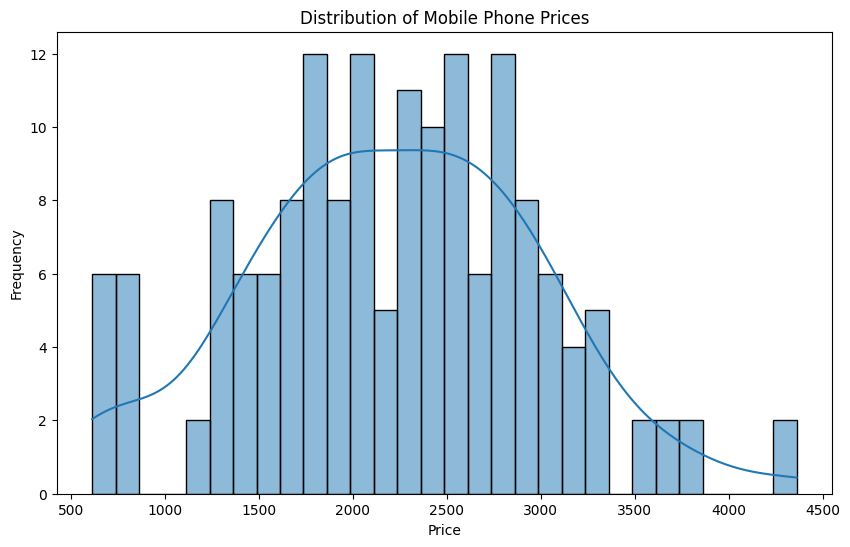

In [190]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True) #bins means how many bars in the histogram, kde=True adds a density curve
plt.title('Distribution of Mobile Phone Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [191]:
counts, bins = np.histogram(df['Price'], bins=10)  
for i in range(len(counts)):
    print(f"Price {bins[i]:.2f} -{bins[i+1]:.2f}: {counts[i]} phones")

Price 614.00 -988.70: 12 phones
Price 988.70 -1363.40: 10 phones
Price 1363.40 -1738.10: 20 phones
Price 1738.10 -2112.80: 32 phones
Price 2112.80 -2487.50: 26 phones
Price 2487.50 -2862.20: 30 phones
Price 2862.20 -3236.90: 18 phones
Price 3236.90 -3611.60: 7 phones
Price 3611.60 -3986.30: 4 phones
Price 3986.30 -4361.00: 2 phones


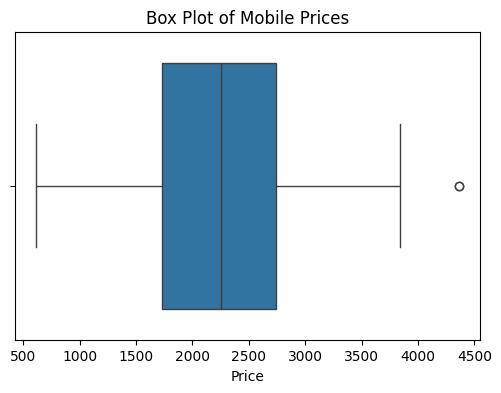

In [192]:
plt.figure(figsize=(6,4)) # fig size means the size of the plot, (width, height)
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Mobile Prices')
plt.show()


##  Detailed Feature Analysis

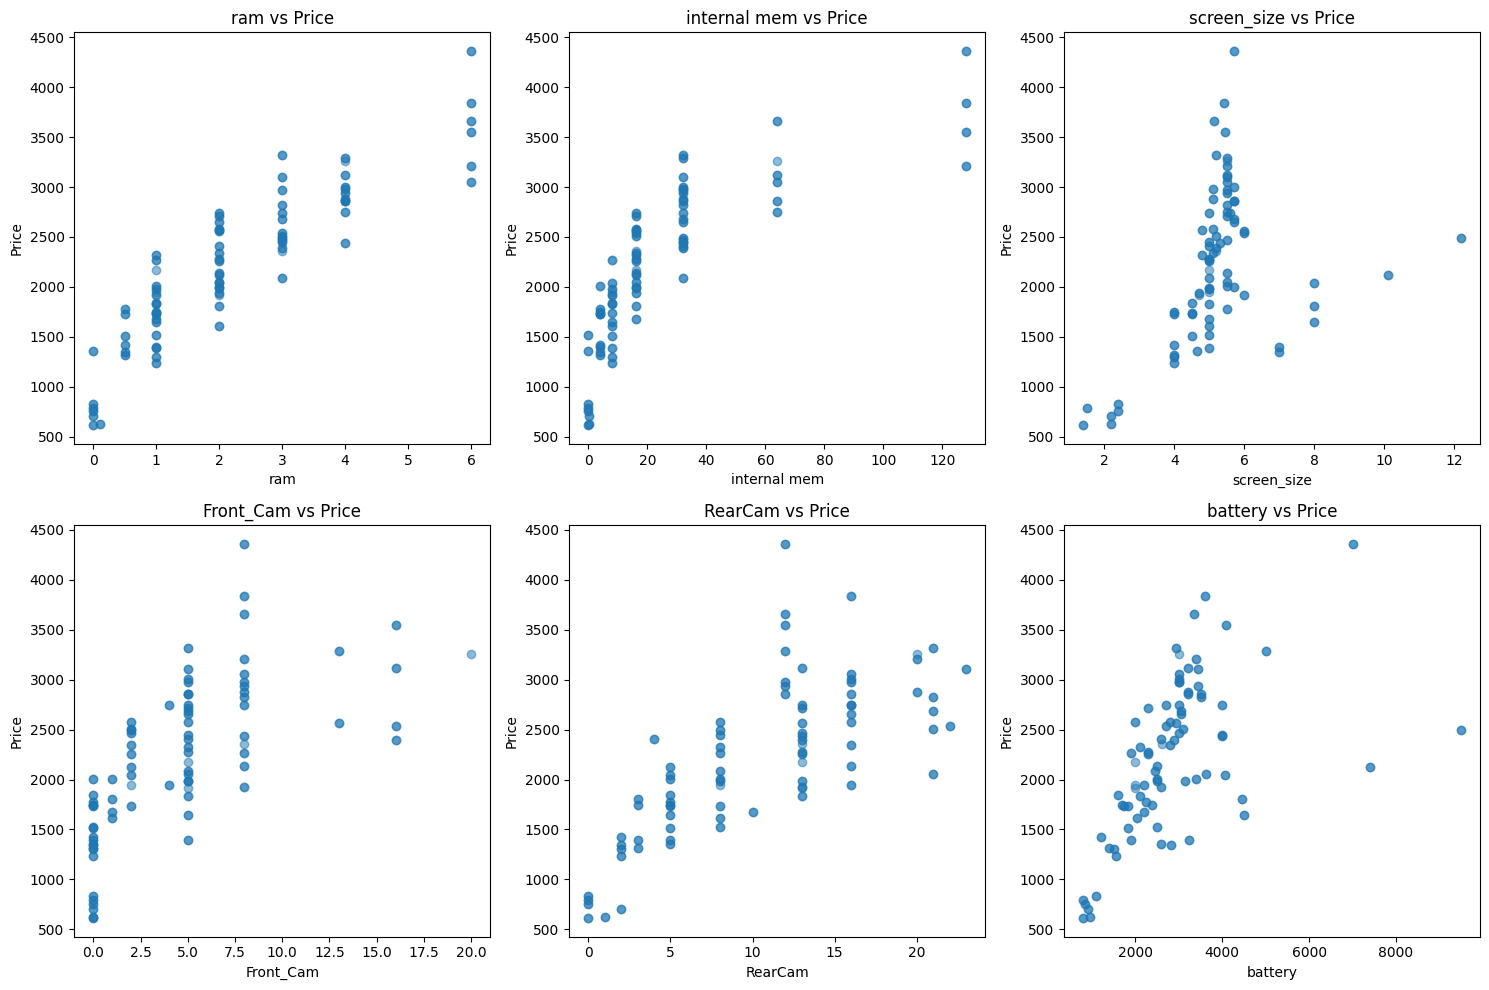

In [193]:
# Analyze the relationship between numerical features and Price
# This helps us understand which features have the strongest impact on price
#  yo bat ahami lai k kasto relationship cha bhanne bujhna madad garne cha, ra future modeling process ma kasto features select garne parne cha bhanne decide garna madad garne cha.
# yesma sabai bhanda ramro relationship price ra ram ko cha, jasle hami lai ram ko importance bujhna madad garne cha, ra future modeling process ma ram lai kasto feature engineering garne parne cha bhanne decide garna madad garne cha.

numerical_features = ['ram', 'internal mem', 'screen_size', 'Front_Cam', 'RearCam', 'battery']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i) # 2 rows, 3 columns of plots
    plt.scatter(df[feature], df['Price'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'{feature} vs Price')
plt.tight_layout()
plt.show()

In [194]:

# yo kina gareko bhane numerical values jastai CPU cores, CPU frequency, PPI, weight, thickness jastai features ko min-max range analyze garna madad garne cha. yesle hami lai data ko distribution bujhna ma madad garne cha, ra outliers identify garna madad garne cha. yesle hami lai data ko quality check garna madad garne cha, ra future modeling process ma kasto preprocessing steps apply garna parne cha bhanne decide garna madad garne cha.
print("Additional Numerical Features Statistics:")
print("="*50)
print(f"CPU Cores - Min: {df['cpu core'].min()} cores, Max: {df['cpu core'].max()} cores")
print(f"CPU Frequency - Min: {df['cpu freq'].min()} GHz, Max: {df['cpu freq'].max()} GHz")
print(f"PPI (Pixels Per Inch) - Min: {df['ppi'].min()}, Max: {df['ppi'].max()}")
print(f"Weight - Min: {df['weight'].min()} grams, Max: {df['weight'].max()} grams")
print(f"Thickness - Min: {df['thickness'].min()} mm, Max: {df['thickness'].max()} mm")
print("="*50)

Additional Numerical Features Statistics:
CPU Cores - Min: 0 cores, Max: 8 cores
CPU Frequency - Min: 0.0 GHz, Max: 2.7 GHz
PPI (Pixels Per Inch) - Min: 121, Max: 806
Weight - Min: 66.0 grams, Max: 753.0 grams
Thickness - Min: 5.1 mm, Max: 18.5 mm


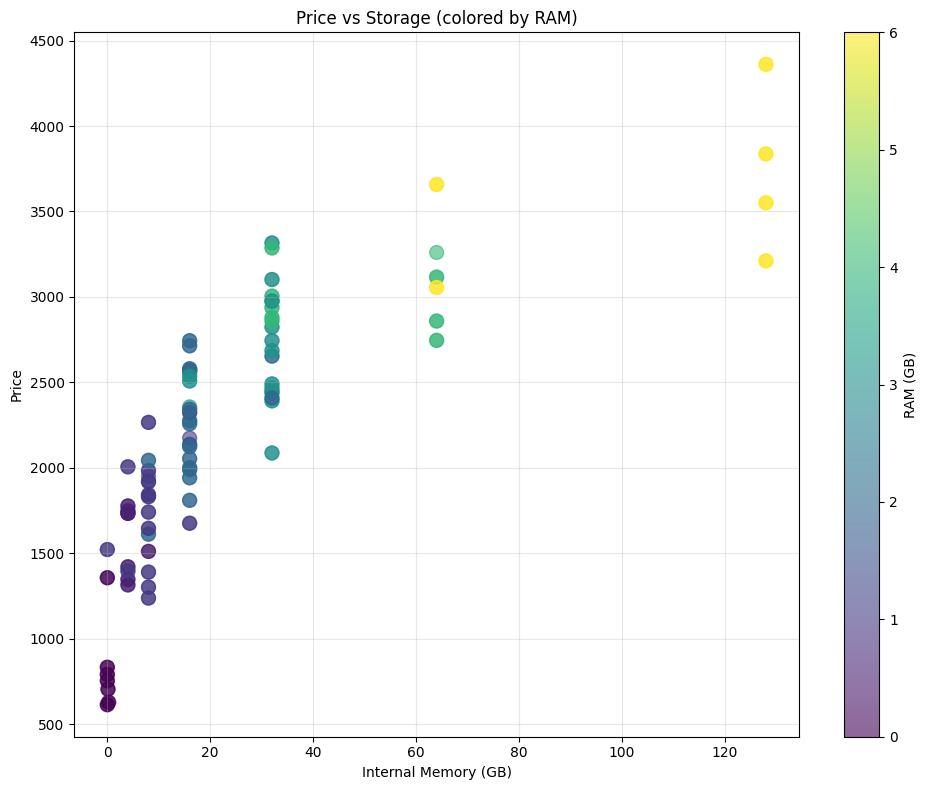

In [195]:
# Visualize correlation between key features
# the diagram shows the relationship between internal memory and price, colored by RAM to add a third dimension of information. This helps us see if higher RAM phones tend to be more expensive at different levels of storage.

key_features = ['ram', 'internal mem', 'battery', 'RearCam', 'Front_Cam', 'cpu core', 'Price']
df_key = df[key_features]

plt.figure(figsize=(10, 8))
plt.scatter(df['internal mem'], df['Price'], c=df['ram'], cmap='viridis', alpha=0.6, s=100)
plt.colorbar(label='RAM (GB)')
plt.xlabel('Internal Memory (GB)')
plt.ylabel('Price')
plt.title('Price vs Storage (colored by RAM)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

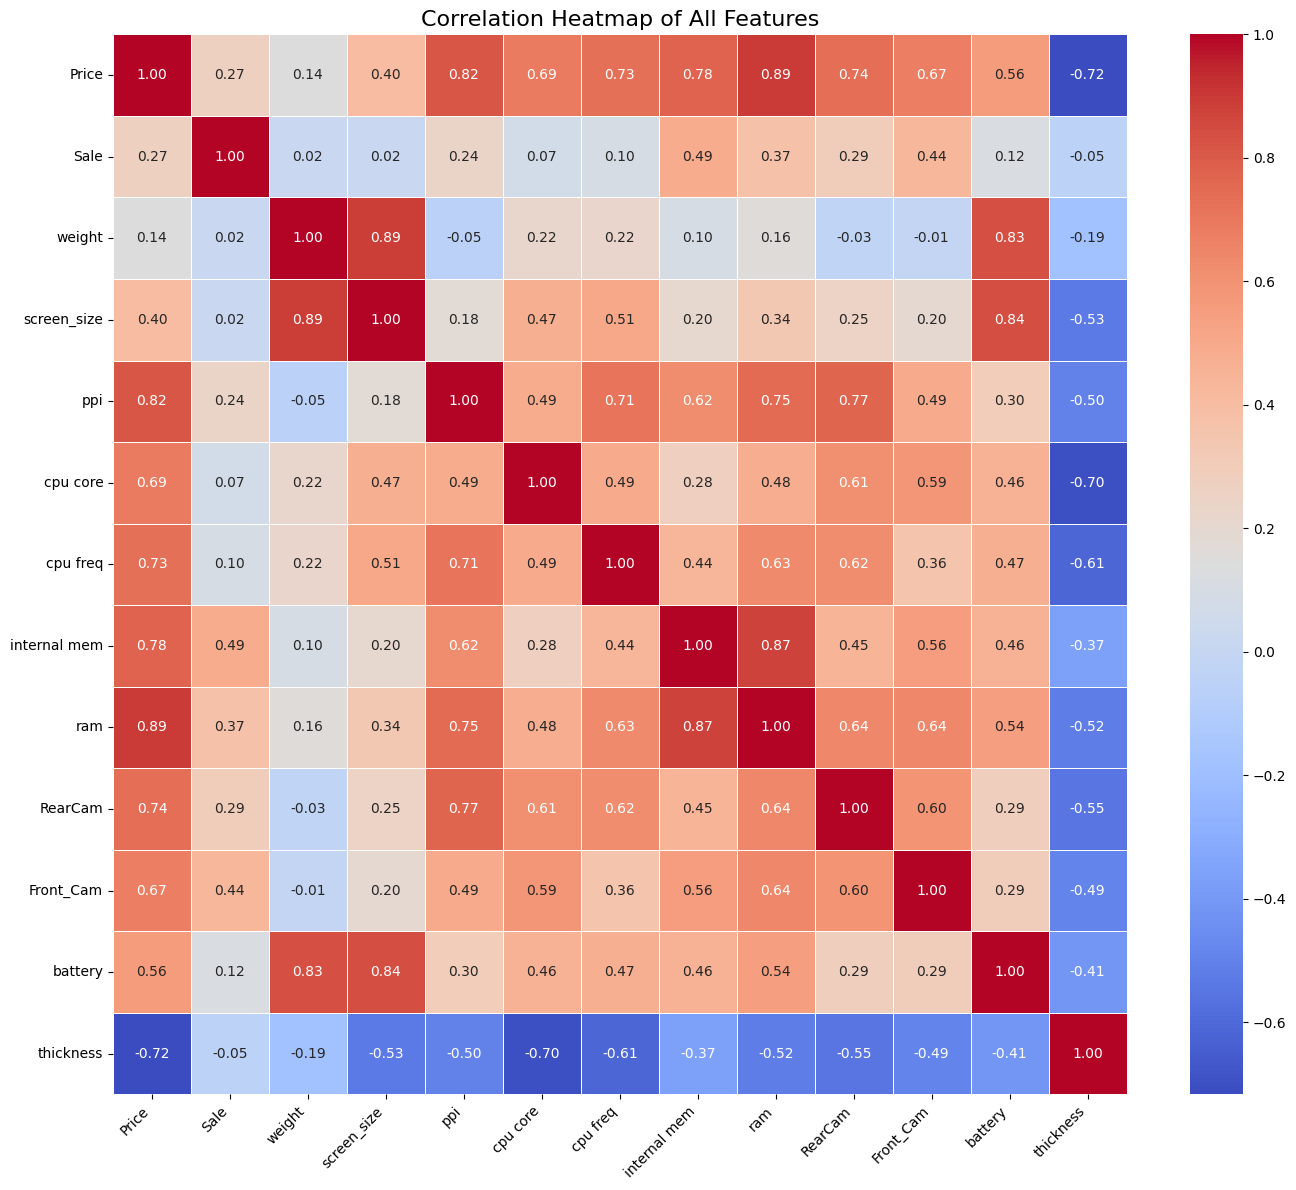

In [196]:
cols = list(df.columns)
cols.insert(0, cols.pop(cols.index('Price')))
df_clean_ordered = df[cols]
plt.figure(figsize=(14, 12)) 

# --- Create the heatmap ---
sns.heatmap(
    df_clean_ordered.corr(), 
    annot=True,        # Show the correlation values on the heatmap
    cmap='coolwarm',   # Use a diverging colormap
    fmt=".2f",         # Format annotations to two decimal places
    linewidths=.5      # Add lines between cells for clarity
)

plt.title("Correlation Heatmap of All Features", fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.tight_layout() # Adjust plot to ensure everything fits
plt.show()

## Data Preprocessing


In [19]:
# Since all features are numerical, we only need to remove the Product_id column
# Product_id is just an identifier and doesn't help in price prediction

# Create a copy of the dataframe
df_clean = df.copy()

#errror='ignore' le garera, jaba Product_id column xaina  bhane pani code run garna milcha without error
df_clean = df_clean.drop('Product_id', axis=1, errors='ignore')

print("Columns after removing Product_id:")
print(df_clean.columns.tolist())
print(f"\nDataframe shape: {df_clean.shape}")


Columns after removing Product_id:
['Price', 'Sale', 'weight', 'screen_size', 'ppi', 'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']

Dataframe shape: (161, 13)


In [20]:
# Convert data types for appropriate columns
# internal mem, ram, RearCam, Front_Cam should be int64 instead of float64
df_clean['internal mem'] = df_clean['internal mem'].astype('int64')
df_clean['ram'] = df_clean['ram'].astype('int64')
df_clean['RearCam'] = df_clean['RearCam'].astype('int64')
df_clean['Front_Cam'] = df_clean['Front_Cam'].astype('int64')

print("Data types after conversion:")
print(df_clean.dtypes)

Data types after conversion:
Price             int64
Sale              int64
weight          float64
screen_size     float64
ppi               int64
cpu core          int64
cpu freq        float64
internal mem      int64
ram               int64
RearCam           int64
Front_Cam         int64
battery           int64
thickness       float64
dtype: object


In [21]:
# Verify the cleaned data
print("First few rows of cleaned data:")
print(df_clean.head()) # display first 5 rows of cleaned dataframe
print("\n" + "="*50)
print(f"Total rows: {len(df_clean)}")
print(f"Total columns: {len(df_clean.columns)}")


First few rows of cleaned data:
   Price  Sale  weight  screen_size  ppi  cpu core  cpu freq  internal mem  \
0   2357    10   135.0          5.2  424         8      1.35            16   
1   1749    10   125.0          4.0  233         2      1.30             4   
2   1916    10   110.0          4.7  312         4      1.20             8   
3   1315    11   118.5          4.0  233         2      1.30             4   
4   1749    11   125.0          4.0  233         2      1.30             4   

   ram  RearCam  Front_Cam  battery  thickness  
0    3       13          8     2610        7.4  
1    1        3          0     1700        9.9  
2    2       13          5     2000        7.6  
3    0        3          0     1400       11.0  
4    1        3          0     1700        9.9  

Total rows: 161
Total columns: 13


## Model Training & Evaluation
We'll train multiple regression models and compare their performance

In [22]:
# Import required libraries for model training and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [23]:
# Splitting the Dataset
from sklearn.model_selection import train_test_split

X = df_clean.drop('Price', axis=1)
y = df_clean['Price']

# test_size=0.2 means 20% of data for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# x_train ma features haru huncha, y_train ma target variable (Price) huncha
# x_test ma features haru huncha, y_test ma target variable (Price) huncha

print(f"Total samples: {len(df_clean)}") # 161 bhaneko number of rows in the cleaned dataframe
print(f"Training samples: {len(X_train)} ({len(X_train)/len(df_clean)*100:.1f}%)") #128 data le model lai train garne cha   
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(df_clean)*100:.1f}%)") #33 data le model test garne cha
print(f"\nFeatures shape: {X.shape}") #12 bhaneko number of features (columns) haru price bahek
print(f"Target shape: {y.shape}")   
print("="*50 + "\n")

Total samples: 161
Training samples: 128 (79.5%)
Testing samples: 33 (20.5%)

Features shape: (161, 12)
Target shape: (161,)



In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# yo code ma hamile different regression models import gareko cha, jasle hami lai price prediction ma kasto model best perform garne cha bhanne compare garna madad garne cha. LinearRegression, Ridge, Lasso jastai linear models, DecisionTreeRegressor jastai tree-based model, RandomForestRegressor ra GradientBoostingRegressor jastai ensemble models, ra XGBRegressor jastai advanced boosting model import gareko cha. yesle hami lai different algorithms ko performance evaluate garna madad garne cha, ra best model select garna madad garne cha future predictions ko lagi.

# yesbata model selection process ma hami lai kasto models try garna parne cha bhanne idea milcha, ra future ma kasto models lai hyperparameter tuning garna parne cha bhanne decide garna madad garne cha.
# hyper pareameter tuning lebhaneko model ko parameters haru lai optimize garna help garcha to improve performance. yesma alpha, n_estimators, learning_rate, max_depth, subsample, colsample_bytree jastai parameters haru lai adjust garna parcha to find the best combination for our dataset. hyperparameter tuning le model ko accuracy badhauna madad garne cha, ra overfitting ya underfitting ko risk minimize garne cha.
features = ['weight', 'screen_size', 'ppi', 'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']

# Create X and y from the HONEST features
X = df_clean[features]
y = df_clean['Price']

# --- VERIFICATION PRINTS ---
print("Columns in the original df_clean:")
print(df_clean.columns.tolist())
print("\nColumns in our new feature matrix X:")
print(X.columns.tolist())
print("="*50 + "\n")

# Now, split the clean data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0), # alpha is the regularization strength, higher values mean more regularization
    "Lasso": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42), 
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, 
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42),
    "XGBoost": XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42
    )
}
#n_estimators means the number of trees in the ensemble, 
# learning_rate controls how much each tree contributes to the final prediction, max_depth limits the depth of each tree to prevent overfitting, 
# subsample is the fraction of samples used for fitting each tree, 
# colsample_bytree is the fraction of features used for fitting each tree, 
# objective specifies the loss function to be optimized (reg:squarederror is for regression tasks),  ensures reproducibility.

results = []

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions on BOTH sets
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    # Calculate metrics for BOTH sets
    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)
    
    train_mae = mean_absolute_error(y_train, train_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    
    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)

    results.append({
        "Model": name,
        "Train R²": train_r2,
        "Test R²": test_r2,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train MSE": train_mse,
        "Test MSE": test_mse
    })


# --- Create and display the final DataFrame ---
results_df = pd.DataFrame(results).sort_values(by="Test R²", ascending=False)

# Format for better readability
pd.set_option('display.float_format', '{:.4f}'.format)
display(results_df)

Columns in the original df_clean:
['Price', 'Sale', 'weight', 'screen_size', 'ppi', 'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']

Columns in our new feature matrix X:
['weight', 'screen_size', 'ppi', 'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']



,Model,Train R²,Test R²,Train MAE,Test MAE,Train MSE,Test MSE
5,Gradient Boosting,0.9986,0.9941,24.0819,45.1488,828.6261,3330.9334
6,XGBoost,1.0000,0.9896,0.5216,38.0514,0.6747,5901.3730
4,Random Forest,0.9926,0.9681,41.6433,105.6965,4360.3528,18092.7337
1,Ridge,0.9499,0.9557,141.4380,134.2477,29631.7393,25128.3331
0,Linear,0.9499,0.9557,141.5786,134.4794,29614.0479,25137.6103
2,Lasso,0.9499,0.9557,141.5762,134.4803,29614.0519,25138.8254
3,Decision Tree,1.0000,0.9039,0.0000,96.4242,0.0000,54450.0000


## Feature Importance Analysis
Understanding which features have the most impact on price prediction

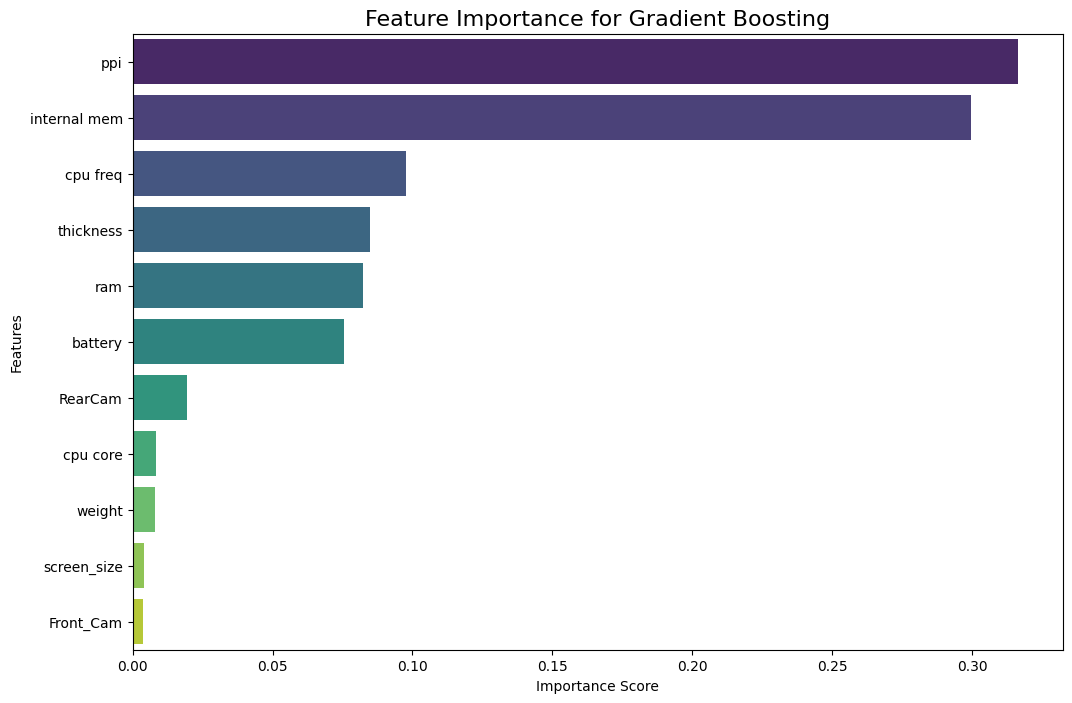

,Feature,Importance
2,ppi,0.3164
5,internal mem,0.2996
4,cpu freq,0.0978
10,thickness,0.0847
6,ram,0.0822
9,battery,0.0755
7,RearCam,0.0196
3,cpu core,0.0083
0,weight,0.0080
1,screen_size,0.0041


In [27]:

# Get feature importances and create a DataFrame
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Gradient Boosting', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Display the DataFrame
display(feature_importance_df)

## Model Creation & Deployment
Building and saving the final model for predictions

In [30]:
import joblib
import os

# === TRAIN AND SAVE THE BEST MODEL ===
print("="*60)
print("TRAINING AND SAVING THE BEST MODEL")
print("="*60)

# Get the best model name (based on highest Test R²)
best_model_name = results_df.iloc[0]["Model"]
print(f"\n✓ Best Model Selected: {best_model_name}")
print(f"  Test R² Score: {results_df.iloc[0]['Test R²']:.4f}")
print(f"  Test MAE: ${results_df.iloc[0]['Test MAE']:.2f}")

# Train the best model on full training data
best_model = models[best_model_name]
print(f"\n✓ Training {best_model_name} on {len(X_train)} samples...")
best_model.fit(X_train, y_train)

# Make predictions to verify
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

print(f"✓ Training complete!")
print(f"  Train R² Score: {r2_score(y_train, train_pred):.4f}")
print(f"  Test R² Score: {r2_score(y_test, test_pred):.4f}")

# Create model directory
model_dir = './models'
os.makedirs(model_dir, exist_ok=True)

# Save the model
model_path = os.path.join(model_dir, 'mobile_price_model.pkl')
joblib.dump(best_model, model_path)
print(f"\n✓ Model saved to: {model_path}")

# Save feature names
feature_names_path = os.path.join(model_dir, 'feature_names.pkl')
joblib.dump(X.columns.tolist(), feature_names_path)
print(f"✓ Feature names saved to: {feature_names_path}")

# Save model metadata
metadata_path = os.path.join(model_dir, 'model_metadata.pkl')
metadata = {
    'model_name': best_model_name,
    'features': X.columns.tolist(),
    'train_r2': r2_score(y_train, train_pred),
    'test_r2': r2_score(y_test, test_pred),
    'train_mae': mean_absolute_error(y_train, train_pred),
    'test_mae': mean_absolute_error(y_test, test_pred)
}
joblib.dump(metadata, metadata_path)
print(f"✓ Model metadata saved to: {metadata_path}")

print("\n" + "="*60)
print("MODEL TRAINING COMPLETE!")
print("="*60)

TRAINING AND SAVING THE BEST MODEL

✓ Best Model Selected: Gradient Boosting
  Test R² Score: 0.9941
  Test MAE: $45.15

✓ Training Gradient Boosting on 128 samples...
✓ Training complete!
  Train R² Score: 0.9986
  Test R² Score: 0.9941

✓ Model saved to: ./models\mobile_price_model.pkl
✓ Feature names saved to: ./models\feature_names.pkl
✓ Model metadata saved to: ./models\model_metadata.pkl

MODEL TRAINING COMPLETE!
